# Task 1 - Setup and EDA
In this section, you will: 
- Load the necessary packages required for executing the code
- Load the data
- Prepare the data for further analysis
- Conduct EDA on the data

In [37]:
# Import 'numpy' and 'pandas' for working with numbers and dataframes
import numpy as np
import pandas as pd

# Import 'matplotlib.pyplot' for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

# Import method for regression from 'statsmodels'
import statsmodels.formula.api as smf

# Import methods for regression diagnostic plots from 'statsmodels'
from statsmodels.api import ProbPlot, qqplot

In [38]:
# Load the data and take a look at it
# Note: Make sure that the data is in the same folder as the Jupyter notebook or specify the address correctly
df = pd.read_csv('Buffet_Details.csv', index_col = 0)
df.head()

,Name,Age,Cuisine,Expenditure
Room,,,,
A1,Shilpa,18,Indian,24.65
A2,Jaspreet,32,American,18.54
A3,Dominic,19,Indian,27.66
A4,Ahmad,22,American,19.54
A5,Joseph,28,Indian,17.32


In [39]:
# Study the description of the data
with open('Buffet_Details_Feature_Description.txt', 'r') as f:
    print(f.read())

The "Buffet_Details.csv" data is a completely fabricated data set for use only on the upGrad platform.

Any resemblance to entities past, present or future is merely a coincidence.

Feature Description:
Room = unique room number of the hotel room in which the guest is staying
Name = first name of the guest
Age = age of the guest in years
Cuisine = type of cuisine selected by the guest in their previous meal
Expenditure = total amount of money spent by the guest on their previous meal in the hotel in dollars


In [40]:
# Look at the specifics of the data frame using the '.info()' command
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, A1 to B16
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         32 non-null     object 
 1   Age          32 non-null     int64  
 2   Cuisine      32 non-null     object 
 3   Expenditure  32 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.2+ KB


In [41]:
# Drop the 'Name' feature from the data set using the '.drop()' command
df = df.drop(columns=['Name'])

In [42]:
# Convert the 'Cuisine' feature to the 'category' data type using the '.astype()' command
df['Cuisine'] = df['Cuisine'].astype('category')

In [43]:
# Take a look at the data
df.head()

,Age,Cuisine,Expenditure
Room,,,
A1,18,Indian,24.65
A2,32,American,18.54
A3,19,Indian,27.66
A4,22,American,19.54
A5,28,Indian,17.32


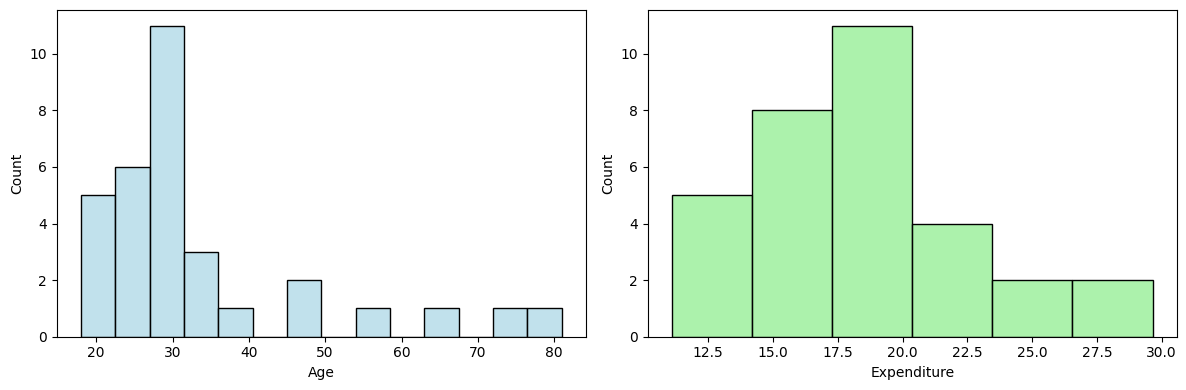

In [44]:
# Create histograms for the variables 'Age' and 'Expenditure'
plt.figure(figsize = (12, 4))

colorname = ['lightblue', 'lightgreen']
fignum = 0
for featurename in ['Age', 'Expenditure']:
    fignum = fignum + 1
    plt.subplot(1, 2, fignum)
    sns.histplot(data = df, x = featurename, color = colorname[fignum - 1])

plt.tight_layout();

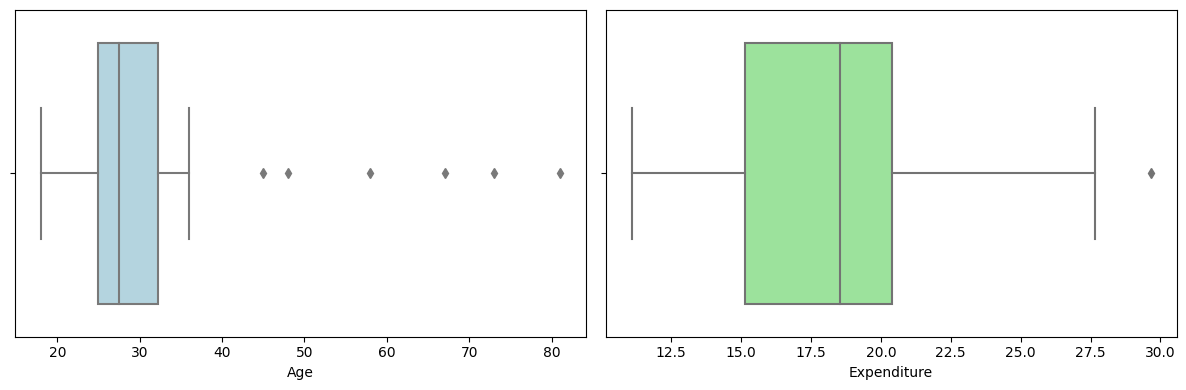

In [45]:
# Create box plots for the variables 'Age' and 'Expenditure'
plt.figure(figsize = (12, 4))

colorname = ['lightblue', 'lightgreen']
fignum = 0
for featurename in ['Age', 'Expenditure']:
    fignum = fignum + 1
    plt.subplot(1, 2, fignum)
    sns.boxplot(data = df, x = featurename, color = colorname[fignum - 1])

plt.tight_layout();

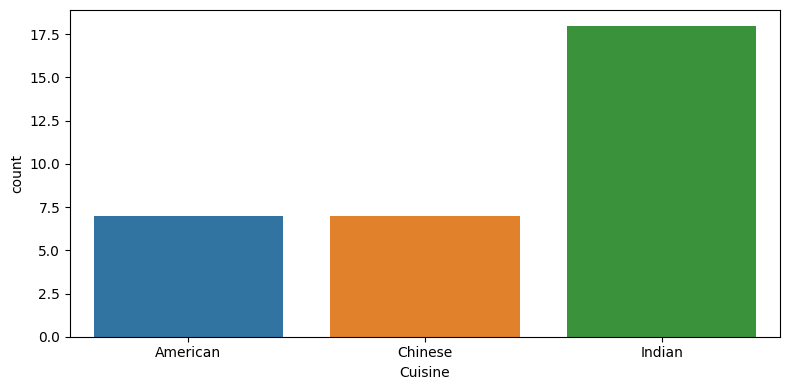

In [46]:
# Create a count plot for the variables 'Cuisine'
plt.figure(figsize = (8, 4))

sns.countplot(data = df, x = 'Cuisine')
    
plt.tight_layout();

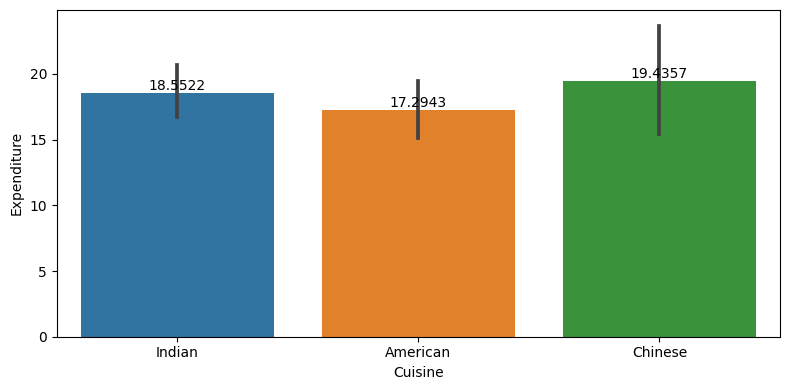

In [64]:
# Create a bar plot for the variable 'Cuisine' with 'Expenditure' on the Y-axis
plt.figure(figsize = (8, 4))

ax = sns.barplot(x = df['Cuisine'], y = df['Expenditure'])
ax.bar_label(ax.containers[0])

plt.tight_layout();

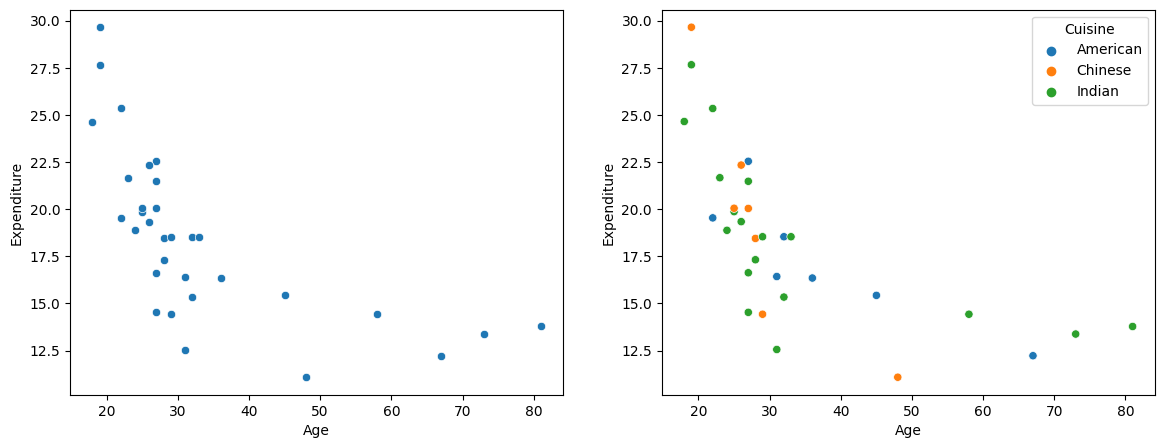

In [48]:
# Create scatter plots of 'Expenditure' versus 'Age', one colored by 'Cuisine' and the other without any categorical division
plt.figure(figsize = (14, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data = df, x = 'Age', y = 'Expenditure')
plt.subplot(1, 2, 2)
sns.scatterplot(data = df, x = 'Age', y = 'Expenditure', hue = 'Cuisine');

C:\Users\Vr3n\codes\upgrad-maryland-analytics\upgrad_venv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


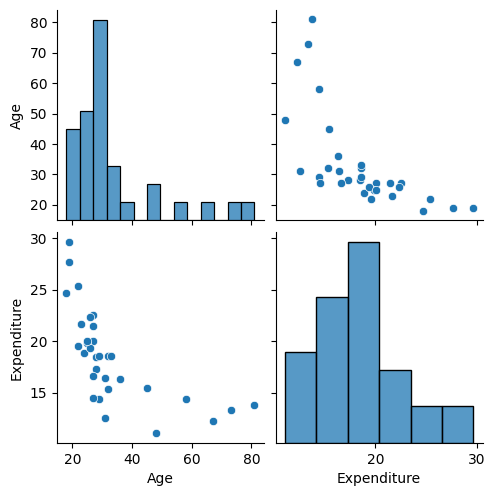

In [49]:
# Create a pair plot for the data
sns.pairplot(df);

# Task 2 - Linear Regression Models
In this section, you will create linear regression models for the data and evaluate them.

### Model 1

In [50]:
# Create and train a linear regression model for the data using the 'smf.ols()' method and view its summary
# Note: The objective is to predict 'Expenditure' using 'Age'
lr_model_1 = smf.ols('Expenditure~Age', df)
lr_model_1 = lr_model_1.fit()
print(lr_model_1.summary())

                            OLS Regression Results                            
Dep. Variable:            Expenditure   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.421
Method:                 Least Squares   F-statistic:                     23.57
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           3.50e-05
Time:                        11:00:35   Log-Likelihood:                -83.331
No. Observations:                  32   AIC:                             170.7
Df Residuals:                      30   BIC:                             173.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.7332      1.421     17.400      0.0

### Model 2

In [53]:
df['Cuisine']

Room
A1       Indian
A2     American
A3       Indian
A4     American
A5       Indian
A6       Indian
A7      Chinese
A8     American
A9       Indian
A10     Chinese
A11      Indian
A12      Indian
A13      Indian
A14    American
A15      Indian
A16     Chinese
B1       Indian
B2       Indian
B3      Chinese
B4     American
B5       Indian
B6       Indian
B7     American
B8      Chinese
B9      Chinese
B10      Indian
B11      Indian
B12      Indian
B13    American
B14      Indian
B15      Indian
B16     Chinese
Name: Cuisine, dtype: category
Categories (3, object): ['American', 'Chinese', 'Indian']

In [56]:
# Create and train a linear regression model for the data using the 'smf.ols()' method and view its summary
# Note: The objective is to predict 'Expenditure' using 'Cuisine'
# Note: Set the base category of 'Cuisine' to 'Indian' using the '.cat.set_categories()' command
categories_order = ["Indian", "American", 'Chinese']
df['Cuisine'] = df['Cuisine'].cat.set_categories(categories_order, ordered=True)
lr_model_2 = smf.ols('Expenditure~Cuisine', df)
lr_model_2 = lr_model_2.fit()
print(lr_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:            Expenditure   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.040
Method:                 Least Squares   F-statistic:                    0.3978
Date:                Tue, 19 Dec 2023   Prob (F-statistic):              0.675
Time:                        11:02:42   Log-Likelihood:                -92.176
No. Observations:                  32   AIC:                             190.4
Df Residuals:                      29   BIC:                             194.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              18.5522    

### Model 3

In [65]:
# Create and train a linear regression model for the data using the 'smf.ols()' method and view its summary
# Note: The objective is to predict 'Expenditure' using 'Age' and 'Cuisine'
# Note: Set the base category of 'Cuisine' to 'Indian' using the '.cat.set_categories()' command
categories_order = ["Indian", "American", 'Chinese']
df['Cuisine'] = df['Cuisine'].cat.set_categories(categories_order, ordered=True)
lr_model_3 = smf.ols('Expenditure~Age+Cuisine', df)
lr_model_3 = lr_model_3.fit()
print(lr_model_3.summary())

                            OLS Regression Results                            
Dep. Variable:            Expenditure   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     7.425
Date:                Tue, 19 Dec 2023   Prob (F-statistic):           0.000829
Time:                        11:06:11   Log-Likelihood:                -83.244
No. Observations:                  32   AIC:                             174.5
Df Residuals:                      28   BIC:                             180.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              24.7844    

# Task 3 - Diagnostic Plots
In this section, you will create and analyze diagnostic plots for *lr_model_3*

In [ ]:
# Create a scatter plot between the fitted and actual values of 'Expenditure'
plt.figure(figsize = (6, 6))
sns.scatterplot(x = lr_model_3.fittedvalues, y = df['Expenditure'])
plt.axline((30, 30), slope = 1, linestyle = '--', linewidth = 1, color = 'r')
plt.xlabel('Fitted Values of Expenditure')
plt.ylabel('Actual Values of Expenditure');

In [ ]:
# Create a scatter plot between the fitted values of 'Expenditure' and the residuals
plt.figure(figsize = (8, 4))
sns.scatterplot(x = lr_model_3.fittedvalues, y = lr_model_3.resid)
plt.axhline(y = 0, xmin = 0, xmax = 1, linewidth = 1, color = 'k')
plt.xlabel('Fitted Values of Expenditure')
plt.ylabel('Residuals');

In [ ]:
# Create a histogram of the residuals
plt.figure(figsize = (8, 4))
sns.histplot(data = df, x = lr_model_3.resid, color = 'lightgray')
plt.xlabel('Residual Value')
plt.ylabel('Frequency');

In [ ]:
# Create a QQ plot for the data
QQ = ProbPlot(lr_model_3.get_influence().resid_studentized_internal)
fig = QQ.qqplot(line = '45', alpha = 0.5, lw = 1)
fig.set_size_inches(5, 5)
fig.gca().set_title('Normal Q-Q')
fig.gca().set_xlabel('Theoretical Quantiles')
fig.gca().set_ylabel('Standardized Residuals');